Texte expliquant comment ça fonctionne et de ce dont on a besoin 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats  

from dqm import diversity

Data Preprocessing

In [2]:
data = pd.read_csv("../../vdp_image_train_and_test_v2.csv",sep=";")

In [3]:
data.head()

,image,camera,sequence,environment,country,sky_cover,surface_condition,timestamp,lighting_level,climatic_conditions,...,Traffic_light_unknown,Traffic_light_green,Bicycle,Other_mobile,Person_group,Bus,Trailer,Caravan,Train,unknown
0,20170320_144339_cam_0_00011702.jpg,FV,20170320_144339,Urban,FR,Cloudy,dry,0,Daylight/Bright,Dry,...,0,0,0,0,0,0,0,0,0,0
1,20170320_144339_cam_0_00011708.jpg,FV,20170320_144339,Urban,FR,Cloudy,dry,1,Daylight/Bright,Dry,...,0,0,0,0,0,0,0,0,0,0
2,20170320_144339_cam_0_00011714.jpg,FV,20170320_144339,Urban,FR,Cloudy,dry,2,Daylight/Bright,Dry,...,0,0,0,0,0,0,0,0,0,0
3,20170320_144339_cam_0_00011720.jpg,FV,20170320_144339,Urban,FR,Cloudy,dry,3,Daylight/Bright,Dry,...,0,0,0,0,0,0,0,0,0,0
4,20170320_144339_cam_0_00011726.jpg,FV,20170320_144339,Urban,FR,Cloudy,dry,4,Daylight/Bright,Dry,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(data.shape)

(124020, 32)


In [5]:
data.columns

Index(['image', 'camera', 'sequence', 'environment', 'country', 'sky_cover',
       'surface_condition', 'timestamp', 'lighting_level',
       'climatic_conditions', 'surface_type', 'isTrain', 'Car', 'Van', 'Truck',
       'Other_occluding', 'Traffic_sign', 'Motorcycle', 'Person',
       'Vehicle_group', 'Traffic_light_yellow', 'Traffic_light_red',
       'Traffic_light_unknown', 'Traffic_light_green', 'Bicycle',
       'Other_mobile', 'Person_group', 'Bus', 'Trailer', 'Caravan', 'Train',
       'unknown'],
      dtype='object')

In [6]:
data.dtypes

image                    object
camera                   object
sequence                 object
environment              object
country                  object
sky_cover                object
surface_condition        object
timestamp                 int64
lighting_level           object
climatic_conditions      object
surface_type             object
isTrain                    bool
Car                       int64
Van                       int64
Truck                     int64
Other_occluding           int64
Traffic_sign              int64
Motorcycle                int64
Person                    int64
Vehicle_group             int64
Traffic_light_yellow      int64
Traffic_light_red         int64
Traffic_light_unknown     int64
Traffic_light_green       int64
Bicycle                   int64
Other_mobile              int64
Person_group              int64
Bus                       int64
Trailer                   int64
Caravan                   int64
Train                     int64
unknown 

In [7]:
data.isna().sum()


image                    0
camera                   0
sequence                 0
environment              0
country                  0
sky_cover                0
surface_condition        0
timestamp                0
lighting_level           0
climatic_conditions      0
surface_type             0
isTrain                  0
Car                      0
Van                      0
Truck                    0
Other_occluding          0
Traffic_sign             0
Motorcycle               0
Person                   0
Vehicle_group            0
Traffic_light_yellow     0
Traffic_light_red        0
Traffic_light_unknown    0
Traffic_light_green      0
Bicycle                  0
Other_mobile             0
Person_group             0
Bus                      0
Trailer                  0
Caravan                  0
Train                    0
unknown                  0
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,124020.0,166.508200,149.113025,0.0,62.0,124.0,234.0,899.0
Car,124020.0,7.122787,4.614932,0.0,4.0,6.0,10.0,41.0
Van,124020.0,0.880140,1.171204,0.0,0.0,0.0,1.0,9.0
Truck,124020.0,0.636373,1.121335,0.0,0.0,0.0,1.0,10.0
Other_occluding,124020.0,0.385591,1.355415,0.0,0.0,0.0,0.0,23.0
Traffic_sign,124020.0,1.942130,2.882223,0.0,0.0,1.0,3.0,37.0
Motorcycle,124020.0,0.609611,1.432627,0.0,0.0,0.0,1.0,19.0
Person,124020.0,4.113006,5.809231,0.0,0.0,2.0,6.0,62.0
Vehicle_group,124020.0,0.655685,1.096322,0.0,0.0,0.0,1.0,14.0
Traffic_light_yellow,124020.0,0.014562,0.151159,0.0,0.0,0.0,0.0,4.0


In [9]:
df = data.drop(['image','camera','sequence','timestamp','surface_condition'],axis=1)

In [10]:
df.head()

,environment,country,sky_cover,lighting_level,climatic_conditions,surface_type,isTrain,Car,Van,Truck,...,Traffic_light_unknown,Traffic_light_green,Bicycle,Other_mobile,Person_group,Bus,Trailer,Caravan,Train,unknown
0,Urban,FR,Cloudy,Daylight/Bright,Dry,Asphalt,True,11,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Urban,FR,Cloudy,Daylight/Bright,Dry,Asphalt,True,10,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Urban,FR,Cloudy,Daylight/Bright,Dry,Asphalt,True,10,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Urban,FR,Cloudy,Daylight/Bright,Dry,Asphalt,True,9,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Urban,FR,Cloudy,Daylight/Bright,Dry,Asphalt,True,8,1,0,...,0,0,0,0,0,0,0,0,0,0


Diversité

Simpson index

In [11]:
res = pd.DataFrame(columns=['Variables','Simpson','Gini'])
res

,Variables,Simpson,Gini


In [12]:
for i in df:
    s = simpson(df[i])
    g = gini(df[i])
    r = pd.DataFrame([[i,s,g]],columns=['Variables','Simpson','Gini'])
    res = pd.concat([res,r])

In [13]:
res

,Variables,Simpson,Gini
0,environment,0.286694,0.286692
0,country,0.651782,0.651777
0,sky_cover,0.567566,0.567561
0,lighting_level,0.363462,0.363459
0,climatic_conditions,0.028321,0.028320
0,surface_type,0.301047,0.301045
0,isTrain,0.359761,0.359758
0,Car,0.932339,0.932331
0,Van,0.651716,0.651711
0,Truck,0.538864,0.538860


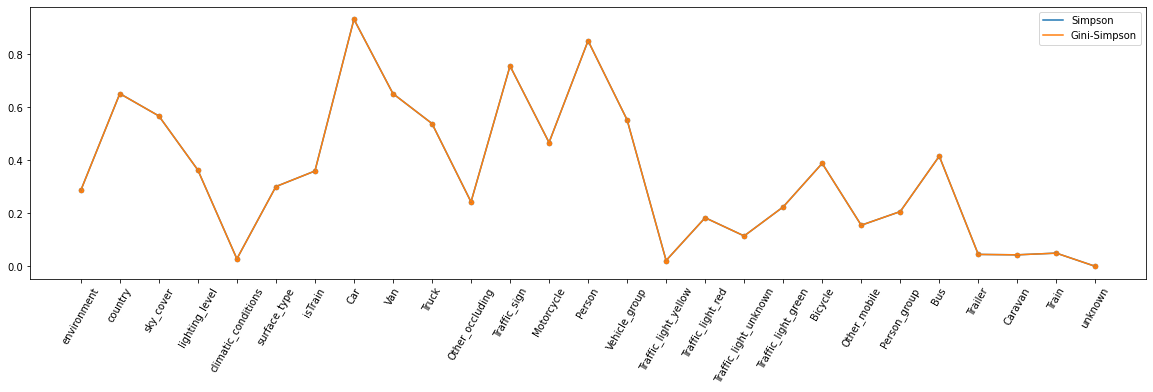

In [14]:
plt.figure(figsize=(20,5))
plt.plot(res['Variables'],res['Simpson'],label='Simpson')
plt.scatter(res['Variables'],res['Simpson'],s=20)
plt.plot(res['Variables'],res['Gini'],label='Gini-Simpson')
plt.scatter(res['Variables'],res['Gini'],s=20)
plt.xticks(rotation=60)
plt.legend()
# Simpson 0 diversité maximale

In [15]:
p = df.value_counts()/sum(df.value_counts())
d = pd.DataFrame(p)

dictVal = {}
for ligne in list(d.index):
    for i in range(len(df.columns)):
        if df.columns[i] not in dictVal:
            dictVal[df.columns[i]] = []
        dictVal[df.columns[i]].append(ligne[i])
pd.DataFrame({**dictVal, "p" : list(p)})


,environment,country,sky_cover,lighting_level,climatic_conditions,surface_type,isTrain,Car,Van,Truck,...,Traffic_light_green,Bicycle,Other_mobile,Person_group,Bus,Trailer,Caravan,Train,unknown,p
0,Urban,US,Clear,Daylight/Bright,Dry,Asphalt,True,10,0,0,...,0,0,0,0,2,0,0,0,0,0.001266
1,Highway,FR,Cloudy,Daylight/Bright,Dry,Asphalt,True,2,1,2,...,0,0,0,0,0,0,0,0,0,0.000903
2,Urban,FR,Clear,Dawn/Dusk/Low_light,Dry,Cobbled/Paving,False,4,2,0,...,0,0,0,0,0,0,0,0,0,0.000839
3,Rural,DE2,Cloudy,Daylight/Bright,Dry,Asphalt,True,1,3,3,...,0,0,0,0,0,0,0,0,0,0.000645
4,Highway,FR,Cloudy,Daylight/Bright,Dry,Asphalt,True,3,1,2,...,0,0,0,0,0,0,0,0,0,0.000645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75808,Urban,FR,Cloudy,Daylight/Bright,Dry,Asphalt,True,5,0,0,...,4,0,0,0,0,0,0,0,0,0.000008
75809,Urban,FR,Cloudy,Daylight/Bright,Dry,Asphalt,True,5,0,0,...,4,0,0,0,0,0,0,0,0,0.000008
75810,Urban,FR,Cloudy,Daylight/Bright,Dry,Asphalt,True,5,0,0,...,2,0,0,0,0,0,0,0,0,0.000008
75811,Urban,FR,Cloudy,Daylight/Bright,Dry,Asphalt,True,5,0,0,...,2,1,0,0,0,0,0,0,0,0.000008


In [16]:
for i in p:
    a=i**2
b=np.sum([a])
print(b)

6.501544597956315e-11
